<span style="font-family: Arial, sans-serif;"><h1>**Multi-Disease Prediction Model**</h1></span>


Multi-health Disease Prediction Model for Diabetes, Parkinson's, and Heart Disease involves developing predictive algorithms utilizing demographic, medical, and lifestyle data to forecast the likelihood of these conditions. By leveraging machine learning and statistical techniques, the model aims to enable early detection and personalized interventions for individuals at risk, facilitating proactive healthcare management strategies. The ultimate goal is to enhance disease prevention, improve patient outcomes, and optimize healthcare resources allocation.

<h2>Importing the Dependencies</h2>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

<h2>Overview of data</h2>
<h2>Diabetes Dataset</h2>

In [5]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv(r"C:\Users\samri\OneDrive\Documents\Data Science\project\diabetes.csv")

In [6]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_dataset['Outcome'].unique()

array([1, 0], dtype=int64)

<h3>Insights</h3>

The dataset consists of 9 columns and 768 rows.

We have 7 columns of integer datatype.

We have 2 columns of float datatype.

This is a Binary Classification Problem.

<h2>Data Cleaning</h2>

In [11]:
print("Missing Values: ",diabetes_dataset.isnull().sum())

Missing Values:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
print("Duplicate Values: ",diabetes_dataset.duplicated().sum())

Duplicate Values:  0


<h4>Insights</h4>

We have checked for missing and noisy data but it is not present in the dataset. Hence, we proceed further.

<h2>Exploratory Data Analysis</h2>

In [13]:
outcome_counts=diabetes_dataset['Outcome'].value_counts()

In [14]:
outcome_counts

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

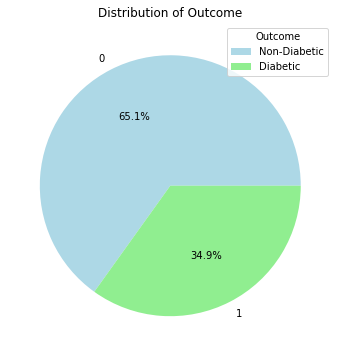

In [15]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Outcome')
plt.legend(title='Outcome', labels={'Non-Diabetic': 0, 'Diabetic': 1})
plt.show()

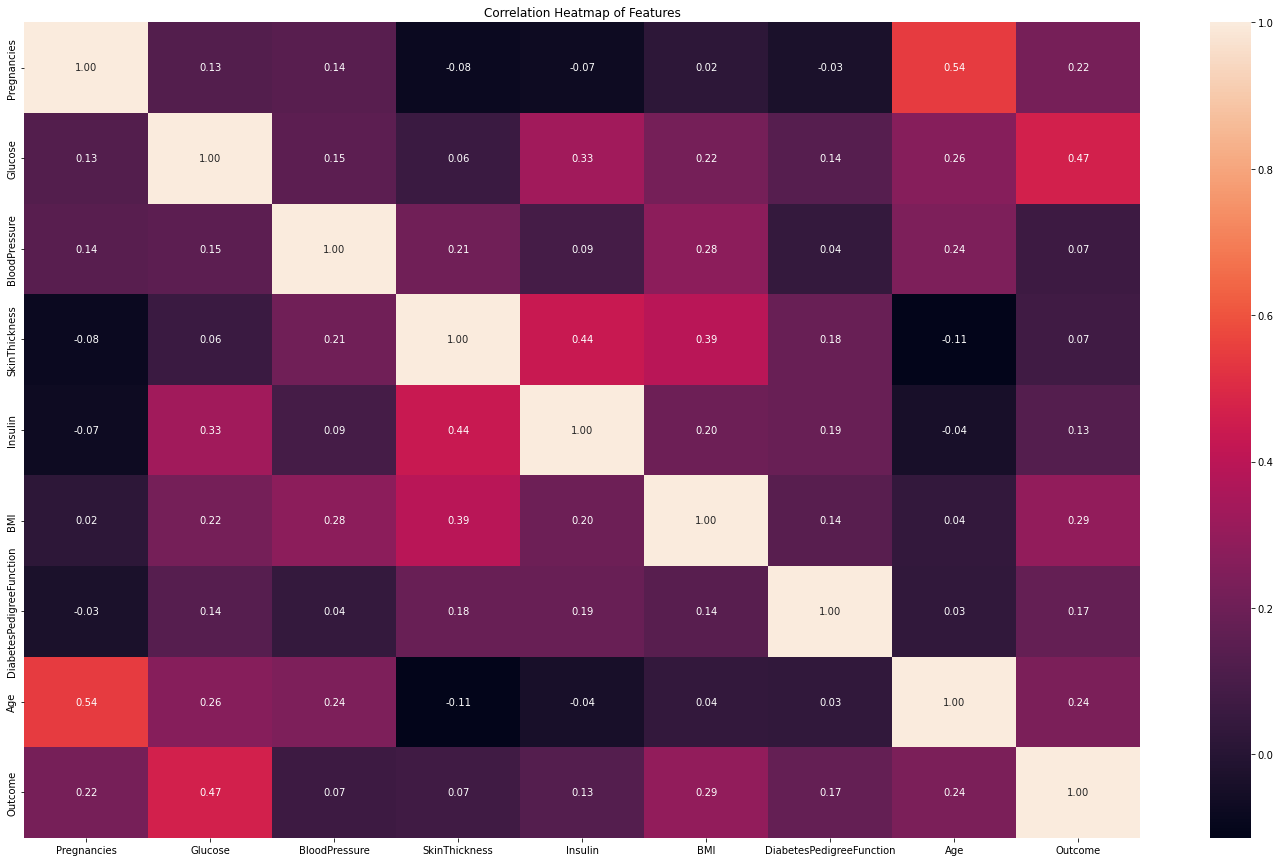

In [16]:
correlation_matrix = diabetes_dataset.corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Features')
plt.show()

In [17]:
mean_values=diabetes_dataset.groupby('Outcome').mean()

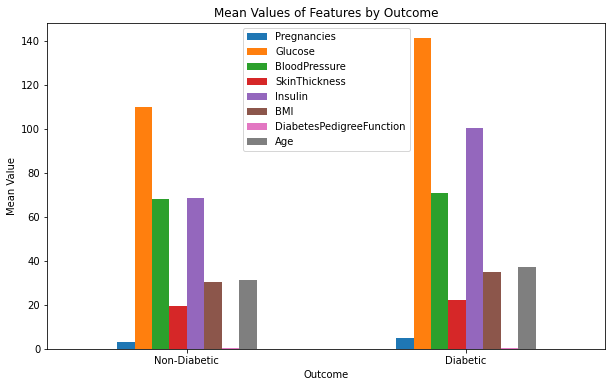

In [18]:
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Features by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'], rotation=0)
plt.legend(loc='upper center')
plt.show()

<h4>Insights</h4>

As we mentioned earlier there were two groups which are 0 for non-diabetic and 1 for diabetic.

Percentage of Non-Diabetics is: 65.1% (500)

Percentage of Diabetics is: 34.9% (268)

<h2>Data Mining</h2>

In [19]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [20]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [21]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


<h3>Training the Model</h3>

<h3>SVM</h3>

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

<h3>Model Evaluation</h3>

<h4>Confusion Matrix</h4>

In [26]:
X_train_prediction = classifier.predict(X_train)
conf_matrix = confusion_matrix(Y_train, X_train_prediction)
conf_matrix

array([[355,  45],
       [ 88, 126]], dtype=int64)

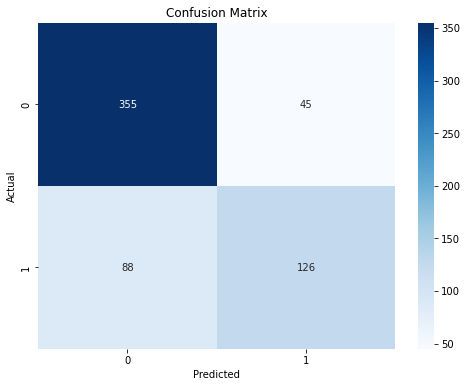

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>Accuracy Score</h4>

In [28]:
# accuracy score on the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [30]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


<h4>Precision</h4>

In [32]:
precision_train= precision_score(Y_train, X_train_prediction)

In [33]:
print('Precision score of the training data : ', precision_train)

Precision score of the training data :  0.7368421052631579


In [34]:
precision_test= precision_score(Y_test, X_test_prediction)

In [35]:
print('Precision score of the test data : ', precision_test)

Precision score of the test data :  0.7567567567567568


<h4>Recall</h4>

In [36]:
recall_train= recall_score(Y_train, X_train_prediction)

In [37]:
print('Recall score of the training data : ', recall_train)

Recall score of the training data :  0.5887850467289719


In [38]:
recall_test= recall_score(Y_test, X_test_prediction)

In [39]:
print('Recall score of the test data : ', recall_test)

Recall score of the test data :  0.5185185185185185


<h4>F1 Score</h4>

In [40]:
f1_train= f1_score(Y_train, X_train_prediction)

In [41]:
print('F1 score of the training data : ', f1_train)

F1 score of the training data :  0.6545454545454544


In [42]:
f1_test= f1_score(Y_test, X_test_prediction)

In [43]:
print('F1 score of the test data : ', f1_test)

F1 score of the test data :  0.6153846153846154


<h4> Visualising Model Evaluation</h4>

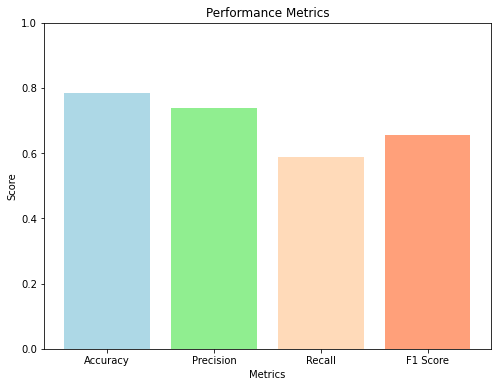

In [51]:
light_blue = '#ADD8E6'
light_green = '#90EE90'
light_orange = '#FFDAB9'
light_red = '#FFA07A'
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [training_data_accuracy, precision_train, recall_train, f1_train]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=[light_blue, light_green, light_orange, light_red])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1
plt.show()

<h4>Insights</h4>

We used the **confusion matrix** to assess our model's performance, determining **accuracy, precision, recall, and F1 score**.

The Accuracy Score of the model is 0.7833876221498371.

The Precision Score of the model is 0.7368421052631579.

The Recall Score of the model is 0.5887850467289719.

The F1 Score of the model is 0.6545454545454544.


<h2>Making a Predictive System</h2>

In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\samri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<h2>Saving the trained model</h2>

In [46]:
import pickle

In [47]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [48]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [49]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\samri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [50]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
